 ## Support Vector Machines

1. A decision boundary between the 2 classes is   created. 
1. SVM learns how important each training data point is in representing the decision boundary between the 2 classes.
1. Typicaly only a subset of the training points matter for defining the decision boundary.
1. The ones that lie on the border between the classes.
1. These are caled support vectors.
1. To make a prediciton for a new point, the distance to each of the support vectors is measured.
1. A classification decision is based on the distances to the support vector, and the importance of the support vectors that was learned during training.


Tuning SVM parameters:
1. The gamma parameter- controls of the width of the Gaussian kernel.
1. It determines the scale of what it means for points to be close together.
1. The C parameter- regularization parameter- It limits the importance of each point in the model.

The C parameter:
1. Small C means a very restricted model, where each data point will have very limited influence.
1. This means the misclassified points barely have any influence on the line.
1. A high C allows the misclassified points to have a stronger influence on the madel and makes the decision boundary bend to correctly classify them


The Gamma parameter:
1. Small gamma means the decision boundary will vary slowly, which yields a model of low complexity.Reflected as a very smooth decision boundary.
1. A high gamma means the boundaries are focussed more on single points, and yields a complex model. 

Strengths:
1. SVMs perform well on a variety of datasets, allowing for complex decision boundaries, even if the data has only a few features.
1. Works well on data that have high either few or many features.
1. If all of the features represent measurements in similar units and are on similar scale, SVM are worth the model.


Weaknesses:
1. SVMs dont scale well with the number of samples.
1. Working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.
1. Requires careful preprocessing of the data and tuning of parameters. Tree based models such as random forests or gradient boosting(which require little or no preprocessing) are better alternatives. 
1. SVMs are hard to inspect and might be tricky to explain the model to a nonexpert. 

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [4]:
cancer.data.shape

(569, 30)

In [5]:
import numpy as np
zip(cancer.target_names,np.bincount(cancer.target))

[('malignant', 212), ('benign', 357)]

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [7]:
from sklearn.cross_validation import train_test_split

In [8]:
Xtrain,Xtest,ytrain,ytest=train_test_split(cancer.data,cancer.target, random_state=0)

In [9]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(Xtrain,ytrain)
print("Train set accuracy: {:.2f}".format(svm.score(Xtrain,ytrain)))

print("Test set accuracy: {:.2f}".format(svm.score(Xtest,ytest)))


Train set accuracy: 1.00
Test set accuracy: 0.63


In [10]:
svm.get_params

<bound method SVC.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

1. The model overfits, with a perfect score on the training dataset and ony 63% on the test set.
1. SVMs are quite sensitive to the settings of the parameters and to the scaling of the data.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

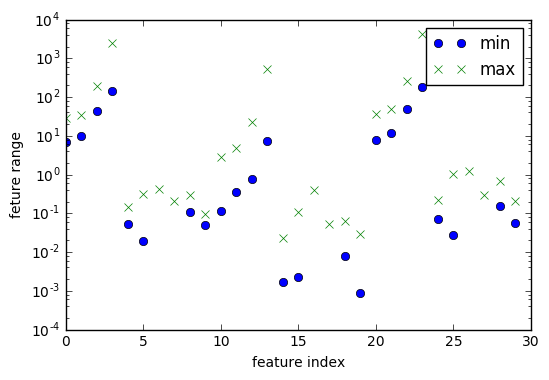

In [12]:
plt.plot(Xtrain.min(axis=0),'o', label='min')
plt.plot(Xtrain.max(axis=0),'x', label='max')
plt.legend(loc=1)
plt.xlabel('feature index')
plt.ylabel('feture range')
plt.yscale('log')

1. The features in the dataset have different range.
1. This is one of the major disadvantage of using SVM.
1. This problem can be resolved by rescaling the features(to be on a similar scale).
1. Preprocessing- MinMaxScaler, StandardScaler 

In [13]:
#preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [14]:
print Xtrain_scaled.min(axis=0)
print Xtrain_scaled.max(axis=0)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [15]:
svm.fit(Xtrain_scaled,ytrain)
print("Scaled traint set accuracy: {:.3f}".format(svm.score(Xtrain_scaled,ytrain)))
print("Scaled test set accuracy: {:.3f}".format(svm.score(Xtest_scaled,ytest)))
print("Nonscaled Test set accuracy: {:.2f}".format(svm.score(Xtest,ytest)))


Scaled traint set accuracy: 0.948
Scaled test set accuracy: 0.951
Nonscaled Test set accuracy: 0.63


1. Scaling made a huge difference!
1. We can alter the fit parameters 'C',gamma for a better model score.

In [16]:
print("C \t train \t test")
for C in [0.1,0.5,0.7,1,3,10,100,1000]:
    svm=SVC(C=C)
    svm.fit(Xtrain_scaled,ytrain)
    print("{} \t {:.3f} \t {:.3f}".format(C,svm.score(Xtrain_scaled,ytrain), svm.score(Xtest_scaled,ytest)))

C 	 train 	 test
0.1 	 0.732 	 0.727
0.5 	 0.934 	 0.951
0.7 	 0.939 	 0.951
1 	 0.948 	 0.951
3 	 0.958 	 0.951
10 	 0.977 	 0.958
100 	 0.986 	 0.965
1000 	 0.988 	 0.972


In [17]:
print("Kernel \t\t train \t\t test")
for kernel in ['linear','poly','rbf']:
    svm=SVC(C=1000,kernel=kernel)
    svm.fit(Xtrain_scaled,ytrain)
    print("{} \t\t {:.3f} \t\t {:.3f}".format(kernel,svm.score(Xtrain_scaled,ytrain), svm.score(Xtest_scaled,ytest)))

Kernel 		 train 		 test
linear 		 0.991 		 0.944
poly 		 0.979 		 0.965
rbf 		 0.988 		 0.972


In [18]:
print("gamma \t train \t test")
for gamma in [0.1,0.5,0.7,1,3,10]:
    svm=SVC(C=1000,kernel='rbf',gamma=gamma)
    svm.fit(Xtrain_scaled,ytrain)
    print("{} \t {:.3f} \t {:.3f}".format(gamma,svm.score(Xtrain_scaled,ytrain), svm.score(Xtest_scaled,ytest)))

gamma 	 train 	 test
0.1 	 0.995 	 0.951
0.5 	 1.000 	 0.958
0.7 	 1.000 	 0.958
1 	 1.000 	 0.958
3 	 1.000 	 0.972
10 	 1.000 	 0.951


In [19]:
svm=SVC(C=1000,kernel='rbf',gamma=3.0)
svm.fit(Xtrain_scaled,ytrain)

print("best params-train set accuracy: {:.3f}".format(svm.score(Xtrain_scaled,ytrain)))
print("best params-test set accuracy: {:.3f}".format(svm.score(Xtest_scaled,ytest)))

best params-train set accuracy: 1.000
best params-test set accuracy: 0.972


In [28]:
X=cancer.data
y=cancer.target

In [29]:
model=SVC(kernel='linear')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
from sklearn.cross_validation import cross_val_score
cvscores=cross_val_score(model,X,y, cv=5, n_jobs=-1)
print cvscores
cvscores.mean()

[ 0.94782609  0.93043478  0.97345133  0.92035398  0.95575221]


0.94556367833782229

In [31]:
from sklearn.grid_search import GridSearchCV
model_param={'kernel':('linear','poly','rbf','sigmoid'), 'C':[0.1,0.5,0.7,1,3,10,100,1000],'gamma':[0.1,0.5,0.7,1,3,10]}
gcsv = GridSearchCV(model,model_param,n_jobs=-1)

In [ ]:
#gcsv.fit(X,y)

In [ ]:
#gcsv.best_params_

In [20]:
#preprocessing using StandardScaler(zero mean and unit variance scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
pca_X = pca.transform(X_scaled)
print('original shape: {}'.format(str(X_scaled.shape)))
print('reduced shape:{}'.format(str(pca_X.shape)))

original shape: (569, 30)
reduced shape:(569, 2)


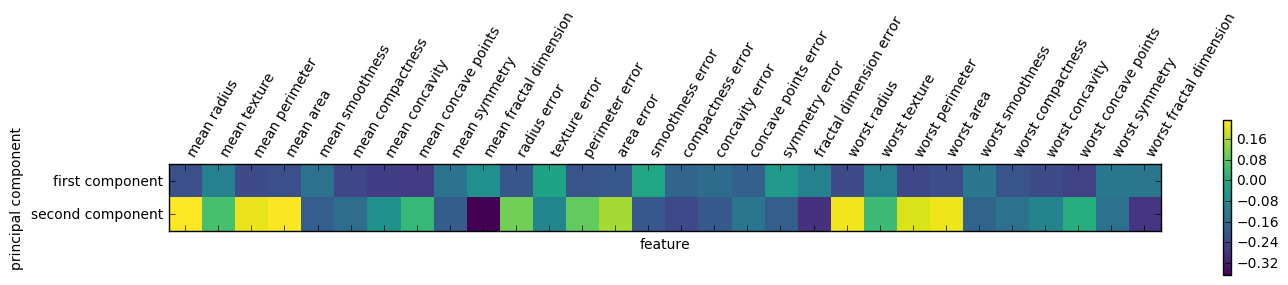

In [27]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['first component', 'second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, 
           ha='left')
plt.xlabel("feature")
plt.ylabel('principal component')